# DATA201 Group Project Data Plotting

This notebook uses all of the csv files created by the first notebook (Which must be run first and in the same directory for this to work), in order to produce plots of the data.

In [1]:
library(tidyverse)
library(ggplot2)
library(scales)

options(repr.plot.width=15, repr.plot.height=8) # Setting plot size options

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5          ✔ purrr   0.3.4     
✔ tibble  3.1.5          ✔ dplyr   1.0.7.9000
✔ tidyr   1.1.3          ✔ stringr 1.4.0     
✔ readr   2.0.1          ✔ forcats 0.5.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Plotting The Vaccination and Case Data

In [2]:
vaccination_case_data <- 'vaccination_case_data.csv' %>%
    read_csv()

Rows: 35 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): WeeklyCases, Volume
date (1): Week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


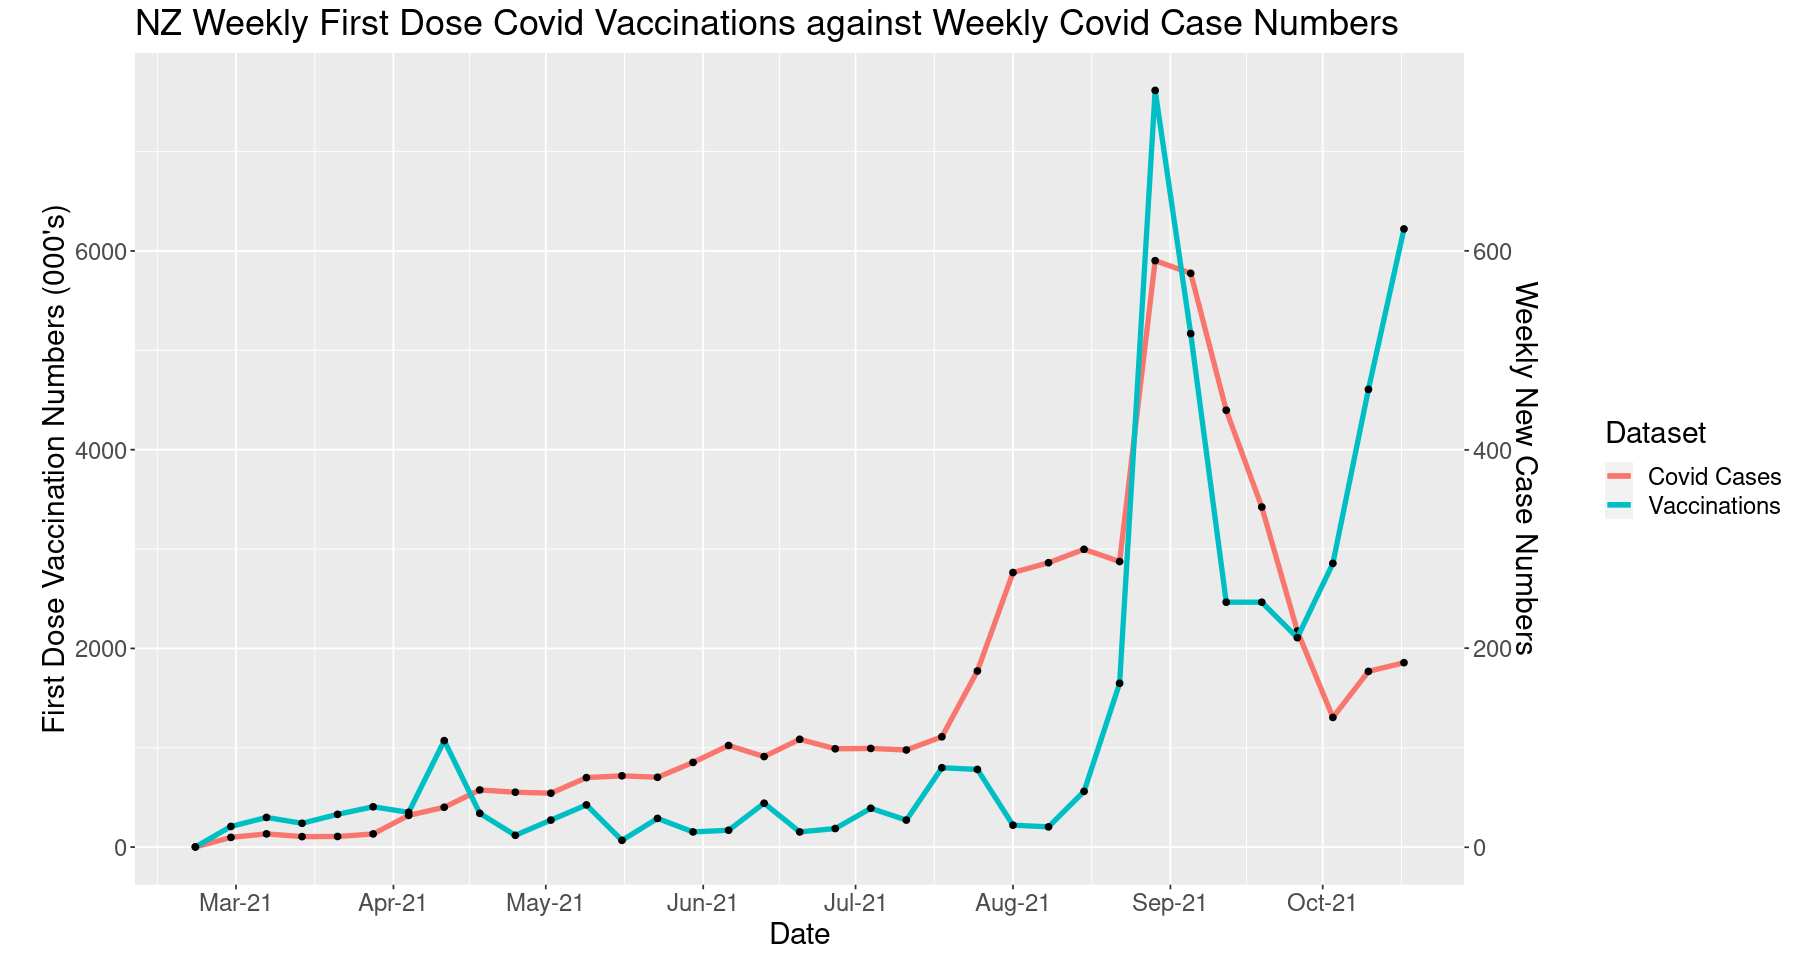

In [3]:
Vacc_Case_Plot <- ggplot(vaccination_case_data, aes(x = Week)) + 
    geom_line(aes(y = Volume*15, color='blue'), size=1.5) + 
    geom_point(aes(y = Volume*15), color='black') +
    geom_line(aes(y = WeeklyCases, color='red'), size=1.5) + 
    geom_point(aes(y = WeeklyCases), color='black') +
    scale_y_continuous(
    
    # Features of the first axis
    name = "\nFirst Dose Vaccination Numbers (000's)",
    
    # Add a second axis and specify its features
    sec.axis = sec_axis( trans=~./10, name="\nWeekly New Case Numbers")
  ) + 
    ggtitle('NZ Weekly First Dose Covid Vaccinations against Weekly Covid Case Numbers') + 
    theme(text = element_text(size=18)) + 
    scale_x_date(date_breaks = "month" , date_labels = "%b-%y") +
    xlab('Date') + 
    scale_color_hue(labels = c("Covid Cases", "Vaccinations")) + 
    labs(color='Dataset')

Vacc_Case_Plot

# Plotting the Regional Jobseeker proportions data

In [4]:
jobseeker_population_df <- 'jobseeker_population_df' %>%
    read_csv()

Rows: 890 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Region
dbl  (3): Jobseeker_benefit, Population, proportion
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
library(tidyverse)
library(ggplot2)
library(stringr)

library(rvest)
library(purrr)
library(polite)
library(xml2)

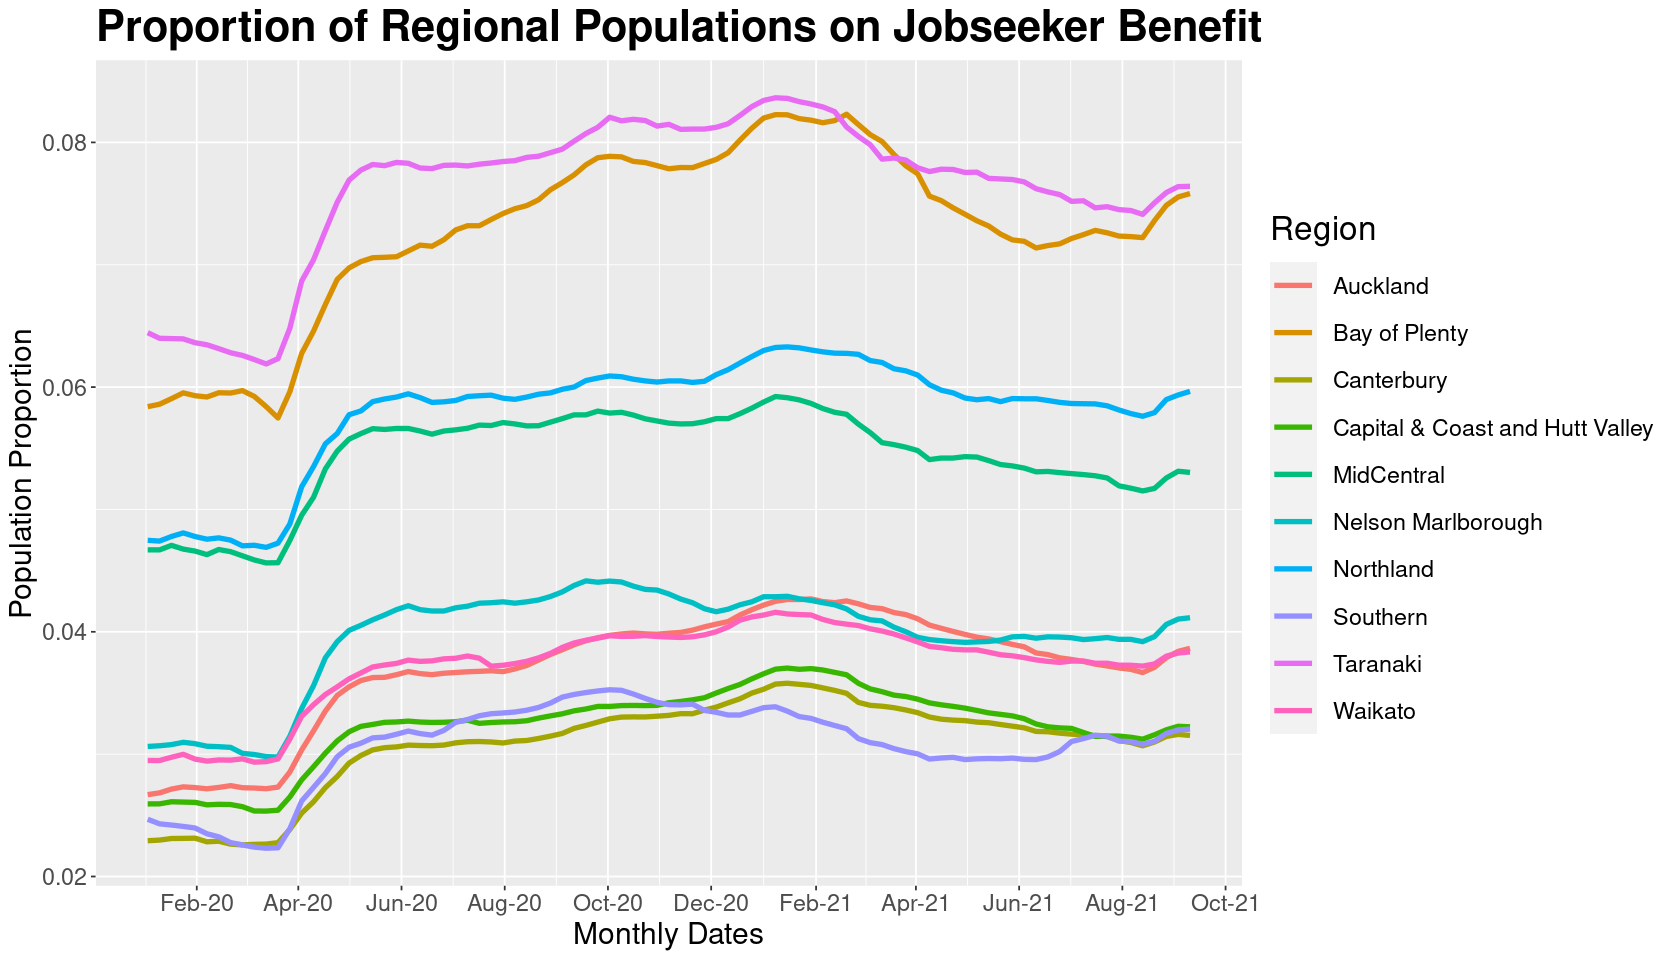

In [12]:
#plot of regional proportion of job seeker benefit

#plot size
options(repr.plot.width=14, repr.plot.height=8)

jobseekerbenefit_regions_plot <- jobseeker_population_df %>% ggplot(aes(group = Region, x= Date, y= proportion, color=Region)) +
    geom_line(size=1.5) + 
    ggtitle('Proportion of Regional Populations on Jobseeker Benefit') + #main title

    theme(plot.title = element_text(hjust=0, size=26, face='bold'), #theme for labels/title/legend
        legend.key.size = unit(4, 'cm'), 
        legend.key.height = unit(1, 'cm'),
        legend.key.width = unit(1, 'cm'), 
        legend.title = element_text(size=20), 
        legend.text = element_text(size=14), 
        axis.text.x = element_text(size=14), 
        axis.text.y = element_text(size=14), 
        axis.title.x = element_text(size=18),
        axis.title.y = element_text(size=18)) + 

    xlab("Monthly Dates") + #x axis label
    ylab("Population Proportion") + #y axis label
    scale_x_date(date_breaks = '2 months', date_labels = '%b-%y') #x label date type

jobseekerbenefit_regions_plot
ggsave('jobseeker_regions_plot.png', plot=jobseekerbenefit_regions_plot,  width=14, height=8)

# Plotting the regional health system trust

In [ ]:
trust_data <- 'trust_data.csv' %>%
    read_csv()

In [ ]:
options(repr.plot.width=14, repr.plot.height=8)

Regionaltrust_plot <- trust_data %>% 
    mutate(date= fct_relevel(date, 'June 2020', 'Sept 2020', 'Dec 2020', 'March 2021')) %>% #setting order for x-axis
    ggplot(aes(x=date, y=Average_rating, group=Regions, color = Regions)) + 

    geom_line(lwd=1, position=position_jitter(w=0, h=0.01)) + #jitter lines so double ups are visible
    expand_limits(y = c(5, 9)) + geom_point(color='black') +
    
    ggtitle('Average Trust in Health System by Regions') + #plot tile
    theme(plot.title = element_text(hjust=0, size=22, face='bold'), #theme for labels/title/legend
            legend.key.size = unit(2, 'cm'), 
            legend.key.height = unit(.6, 'cm'),
            legend.key.width = unit(.6, 'cm'), 
            legend.title = element_text(size=20), 
            legend.text = element_text(size=14), 
            axis.text.x = element_text(size=14), 
            axis.text.y = element_text(size=14), 
            axis.title.x = element_text(size=18),
            axis.title.y = element_text(size=18)) +

    xlab('Yearly Quarter') + #x and y labels
    ylab('Average Rating (Out of 10)') 
    
Regionaltrust_plot

# Plotting the border crossing against case numbers data

In [ ]:
border_crossing_covid_data <- 'bordercrossing_covid.csv' %>%
    read_csv()

options(repr.plot.width=15, repr.plot.height=8)

In [ ]:
allregionborder_covidcase <- ggplot(border_crossing_covid_data, aes(x=as.Date(Dates))) + 
    geom_line(aes(y=Total_border_crossed, color="Border crossing"), size=1.5) + #Total border crossing line
    geom_line(aes(y=New_cases*125, color="Daily cases"), size=1.5) + #Daily cases line

    scale_x_date(date_labels = "%Y-%m-%d", date_breaks = "1 month") + #Date label on x-axis, monthly intervals
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) + #Rotate Date label on x-axis 
       
    scale_y_continuous( #Label for both y-axis (left and right)
        name = "Total border crossed for all region",
        sec.axis = sec_axis(~./125, name="Daily covid cases")
    ) +

    theme( #Theme for the labels
        axis.title.y = element_text(colour = "black", size=15),
        axis.title.y.right = element_text(colour = "black", size=15),
        axis.title.x = element_text(colour = "black", size=15)
    ) +

    theme(legend.title=element_blank()) + #Removing legend title
    ggtitle('All region daily border crossing against daily covid cases 2020-2021') + #Plot title
    theme(plot.title = element_text(size=30, face="bold", hjust=0.5)) + #Theme for plot title
    labs(x="Months") #X label

allregionborder_covidcase